# QNN on Pynq

This notebook covers how to use low quantized neural networks on Pynq. 
It shows an example of CIFAR-10 image recognition with different precision neural network inspired at VGG-16, featuring 6 convolutional layers, 3 max pool layers and 3 fully connected layers. There are 3 different precision available:

- CNVW1A1 using 1 bit weights and 1 bit activation,
- CNVW1A2 using 1 bit weights and 2 bit activation and
- CNVW2A2 using 2 bit weights and 2 bit activation

All of them can be performed in pure software or hardware accelerated environment.

## 1. Import the package

The bnn package contains the Python classifiers for CNV and LFC networks (`CnvClassifier` and `LfcClassifier`). Both of them provide several functions to perform inference on single or multiple pictures.

In [1]:
import bnn

## 2. Load a image

Download an image showing a class of Cifar-10 set and place it on a valid directory on PYNQ. This example will perform inference on a deer, the image can be loaded in Python and can be displayed through the notebook:

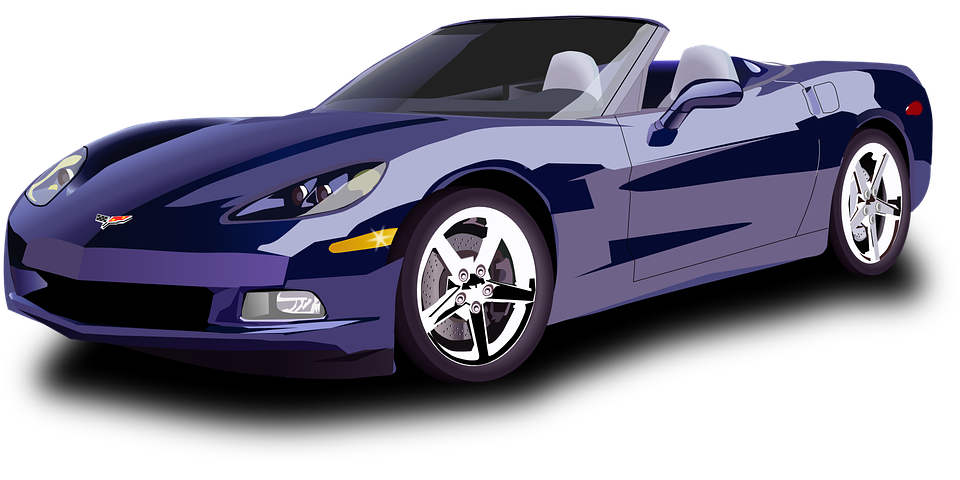

In [20]:
from PIL import Image
import numpy as np

img = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/car.png')
img 

## 3. Hardware accelerated inference

The inference can be performed with different precision for weights and activation. Creating a specific Classifier will automatically download the correct bitstream onto PL and load the weights and thresholds trained on the specific dataset. 
Passing a runtime attribute will allow to choose between hardware accelerated or pure software inference.

### Case 1: 
#### W1A1 - 1 bit weight and 1 activation

Instantiate the classifier:

In [ ]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_HW)

Inference can be performed by using `classify_image` for single and `classify_images` for multiple images. The image(s) will automatically be processed to match Cifar-10 format that can be taken by CNV network. For Cifar-10 preformatted pictures `classify_cifar` and `classify_cifars` are available (see notebook CNV-QNN_Cifar10_TestSet). 

In [ ]:
inferred_class = hw_classifier.classify_image(img)
hw_timeW1A1 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

It is also possible to get the rankings of each class using `classify_image_details` for single and `classify_images_details` for multiple images:

In [ ]:
rankingsW1A1 = hw_classifier.classify_image_details(img)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW1A1)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW1A1[i]))

As expected deer is the highest ranked class.

### Case 2:
#### W1A2 - 1 bit weight and 2 bit activation

In [ ]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'cifar10',bnn.RUNTIME_HW)

In [ ]:
inferred_class = hw_classifier.classify_image(img)
hw_timeW1A2 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

and now with rankings:

In [ ]:
rankingsW1A2 = hw_classifier.classify_image_details(img)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW1A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW1A2[i]))

### Case 3:
#### W2A2 - 2 bit weight and 2 bit activation

In [ ]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'cifar10',bnn.RUNTIME_HW)

In [ ]:
inferred_class = hw_classifier.classify_image(img)
hw_timeW2A2 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

In [ ]:
rankingsW2A2 = hw_classifier.classify_image_details(img)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW2A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW2A2[i]))

## 4. Software inference

For sake of comparison every network can be performed in pure software environment. See how inference times increase massively:

In [12]:
# sw_W1A1 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_SW)
# sw_W1A2 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'cifar10',bnn.RUNTIME_SW)
sw_W2A2 = bnn.CnvClassifier(bnn.NETWORK_CNVW4A2,'cifar10',bnn.RUNTIME_SW)

In [21]:
# print("-- Software inference CNVW1A1 --")
# out=sw_W1A1.classify_image(img)
# sw_timeW1A1=sw_W1A1.usecPerImage
# print("Class number: {0}".format(out))

# print("\n-- Software inference CNVW1A2 --")
# out=sw_W1A2.classify_image(img)
# sw_timeW1A2=sw_W1A2.usecPerImage
# print("Class number: {0}".format(out))

print("\n-- Software inference CNVW2A2 --")
out=sw_W2A2.classify_image(img)
sw_timeW2A2=sw_W2A2.usecPerImage
print("Class number: {0}".format(out))
print("Class name: {0}".format(sw_W2A2.class_name(out)))


-- Software inference CNVW2A2 --
Inference took 10246140.00 microseconds
Classification rate: 0.10 images per second
Class number: 1
Class name: Automobile


## 5. Summary

### Inference time

Results can be visualized using `matplotlib`. Here the comparison of hardware vs software execution time which is plotted in microseconds:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

hw_bars = [hw_timeW1A1, hw_timeW1A2, hw_timeW2A2]
sw_bars = [sw_timeW1A1, sw_timeW1A2, sw_timeW2A2]

x_pos = np.arange(3)
fig, ax = plt.subplots()
ax.bar(x_pos - 0.25, hw_bars, 0.25)
ax.bar(x_pos + 0.25, sw_bars, 0.25)
ax.set_xticklabels(["W1A1","W1A2","W2A2"], rotation='vertical')
ax.set_xticks(x_pos)
plt.legend(["hardware","software"])
plt.semilogy()
plt.show()

### Class Rankings

The rankings are different distributed to each class for each network:

#### W1A1:

The rankings here are showed in units of 200 for better visualization.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x_pos = np.arange(len(rankingsW1A1))
fig, ax = plt.subplots()
ax.bar(x_pos, (rankingsW1A1/200), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W1A2:

In [ ]:
x_pos = np.arange(len(rankingsW1A2))
fig, ax = plt.subplots()
ax.bar(x_pos, rankingsW1A2, 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W2A2:

In [ ]:
x_pos = np.arange(len(rankingsW2A2))
fig, ax = plt.subplots()
ax.bar(x_pos, rankingsW2A2, 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

## 6. Reset the device

In [ ]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()